# Worldwide Layoffs analysis 
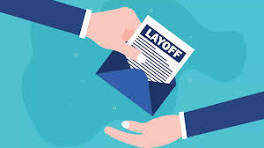

In [1]:
!pip install -q statsmodels

In [2]:
!pip install -q jupyter-dash pandas plotly

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

In [4]:
df= pd.read_csv("layoffs.csv")

In [5]:
df

company        location        industry  total_laid_off  \
0           OpenSea   New York City          Crypto             NaN   
1            Viasat       San Diego           Other           800.0   
2         OpenSpace     SF Bay Area    Construction             NaN   
3           Orchard   New York City     Real Estate             NaN   
4       Informatica     SF Bay Area            Data           545.0   
...             ...             ...             ...             ...   
3143        Service     Los Angeles          Travel             NaN   
3144   HopSkipDrive     Los Angeles  Transportation             8.0   
3145    Panda Squad     SF Bay Area        Consumer             6.0   
3146  Tamara Mellon     Los Angeles          Retail            20.0   
3147       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off        date     stage        country  funds_raised  
0                    0.50  2023-11-03  Series C  United States         427.0  
1                    0.10  2023-11-02  Post-IPO  United States         366.0  
2                     NaN  2023-11-02  Series D  United States         200.0  
3                     NaN  2023-11-02  Series D  United States         472.0  
4                    0.10  2023-11-01  Post-IPO  United States           NaN  
...                   ...         ...       ...            ...           ...  
3143                 1.00  2020-03-16      Seed  United States           5.1  
3144                 0.10  2020-03-13   Unknown  United States          45.0  
3145                 0.75  2020-03-13      Seed  United States           1.0  
3146                 0.40  2020-03-12  Series C  United States          90.0  
3147                  NaN  2020-03-11  Series A  United States          12.0  

[3148 rows x 9 columns]

# EDA

### Finding Missing values

In [9]:
missing_per_column = df.isnull().sum()
print("Count of missing values per column:")
print(missing_per_column)

missing_total_size = df.isnull().sum().sum()
print("\nSize of missing values in the entire DataFrame:", missing_total_size)

Count of missing values per column:
company                   0
location                  1
industry                  1
total_laid_off         1045
percentage_laid_off    1104
date                      0
stage                     7
country                   0
funds_raised            328
dtype: int64

Size of missing values in the entire DataFrame: 2486


In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       total_laid_off  percentage_laid_off   funds_raised
count     2103.000000          2044.000000    2820.000000
mean       242.659058             0.273433     768.965779
std        778.254590             0.274940    4986.360121
min          3.000000             0.000000       0.000000
25%         40.000000             0.100000      50.000000
50%         80.000000             0.170000     157.950000
75%        180.000000             0.300000     445.000000
max      12000.000000             1.000000  121900.000000


### Correlation Analysis

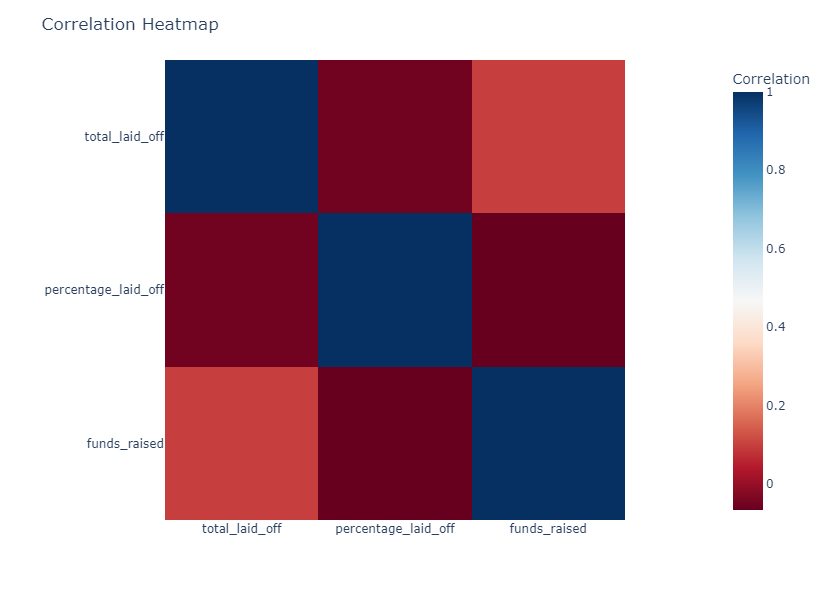

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu')

fig.update_layout(title='Correlation Heatmap',
                  width=800, height=600)

fig.show()

### Finding Duplicate Data

In [8]:
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

df.drop_duplicates(inplace=True)

Duplicate Rows:
     company location        industry  total_laid_off  percentage_laid_off  \
2282   Cazoo   London  Transportation           750.0                 0.15   

            date     stage         country  funds_raised  
2282  2022-06-07  Post-IPO  United Kingdom        2000.0  


In [10]:
df.dropna(subset=['location', 'industry','stage'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3138 entries, 0 to 3147
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3138 non-null   object 
 1   location             3138 non-null   object 
 2   industry             3138 non-null   object 
 3   total_laid_off       2098 non-null   float64
 4   percentage_laid_off  2035 non-null   float64
 5   date                 3138 non-null   object 
 6   stage                3138 non-null   object 
 7   country              3138 non-null   object 
 8   funds_raised         2816 non-null   float64
dtypes: float64(3), object(6)
memory usage: 245.2+ KB


### created two data set where 1st filled with 0 and 2nd with interpolate 

In [13]:
cols_with_missing = ['total_laid_off', 'percentage_laid_off', 'funds_raised']

df_interpolated = df.copy()

df_interpolated[cols_with_missing] = df_interpolated[cols_with_missing].interpolate(method='linear')

df_filled_with_zero = df.copy()

df_filled_with_zero[cols_with_missing] = df_filled_with_zero[cols_with_missing].fillna(0)

In [14]:
df_0=df_filled_with_zero

In [15]:
df_1=df_interpolated

In [42]:
df_1=df_1.fillna(0)
df_1.round(decimals=2)

company        location        industry  total_laid_off  \
0           OpenSea   New York City          Crypto             0.0   
1            Viasat       San Diego           Other           800.0   
2         OpenSpace     SF Bay Area    Construction           715.0   
3           Orchard   New York City     Real Estate           630.0   
4       Informatica     SF Bay Area            Data           545.0   
...             ...             ...             ...             ...   
3143        Service     Los Angeles          Travel            12.0   
3144   HopSkipDrive     Los Angeles  Transportation             8.0   
3145    Panda Squad     SF Bay Area        Consumer             6.0   
3146  Tamara Mellon     Los Angeles          Retail            20.0   
3147       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off       date     stage        country  funds_raised  
0                    0.50 2023-11-03  Series C  United States         427.0  
1                    0.10 2023-11-02  Post-IPO  United States         366.0  
2                    0.10 2023-11-02  Series D  United States         200.0  
3                    0.10 2023-11-02  Series D  United States         472.0  
4                    0.10 2023-11-01  Post-IPO  United States        1436.0  
...                   ...        ...       ...            ...           ...  
3143                 1.00 2020-03-16      Seed  United States           5.1  
3144                 0.10 2020-03-13   Unknown  United States          45.0  
3145                 0.75 2020-03-13      Seed  United States           1.0  
3146                 0.40 2020-03-12  Series C  United States          90.0  
3147                 0.40 2020-03-11  Series A  United States          12.0  

[3138 rows x 9 columns]

### comparison between df_0 and df_1

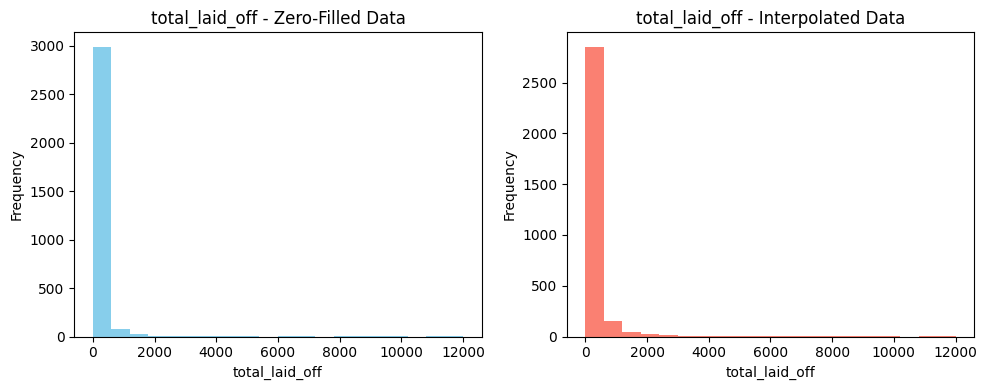

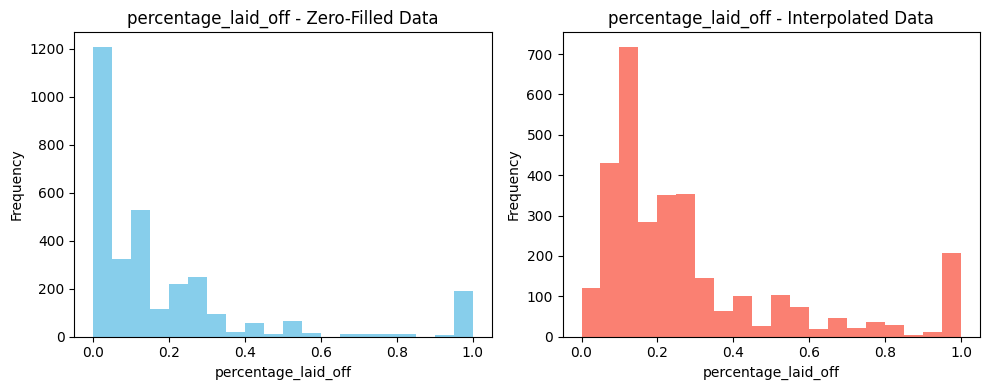

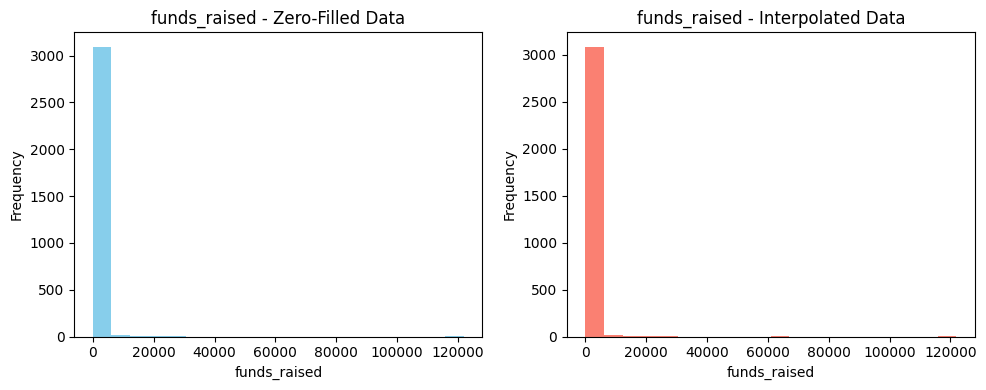

In [17]:
columns_to_compare = ['total_laid_off', 'percentage_laid_off', 'funds_raised']

for col in columns_to_compare:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df_0[col], bins=20, color='skyblue')
    plt.title(f'{col} - Zero-Filled Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(df_1[col], bins=20, color='salmon')
    plt.title(f'{col} - Interpolated Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

### checking data set is everything clean before visualization

Missing Values in df_0:
company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

Data Summary for df_0:
<class 'pandas.core.frame.DataFrame'>
Index: 3138 entries, 0 to 3147
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3138 non-null   object 
 1   location             3138 non-null   object 
 2   industry             3138 non-null   object 
 3   total_laid_off       3138 non-null   float64
 4   percentage_laid_off  3138 non-null   float64
 5   date                 3138 non-null   object 
 6   stage                3138 non-null   object 
 7   country              3138 non-null   object 
 8   funds_raised         3138 non-null   float64
dtypes: float64(3), object(6)
memory usage: 245.2+ KB
None
    

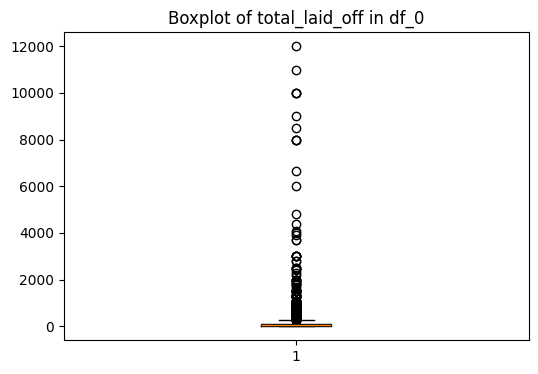

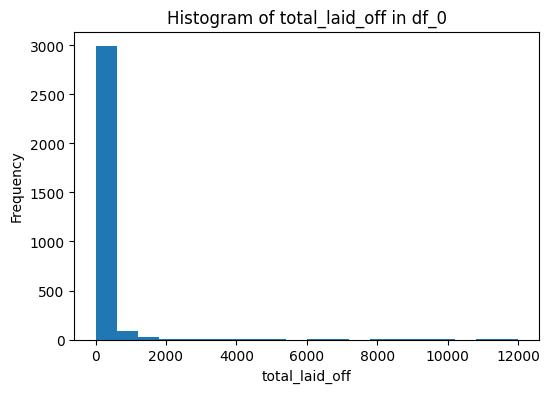

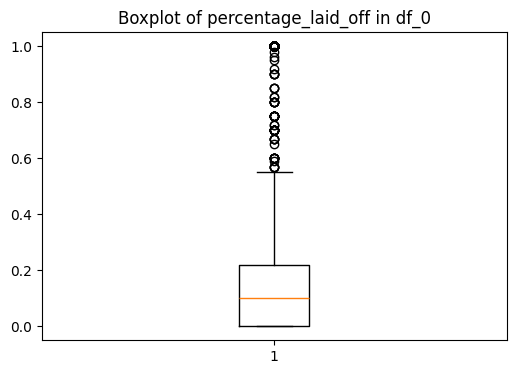

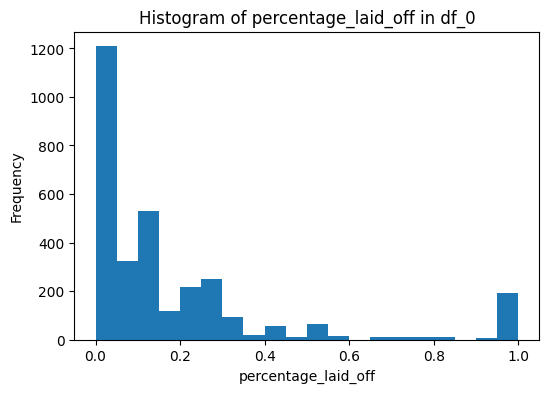

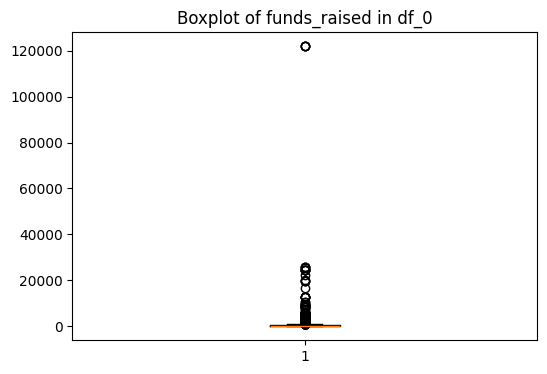

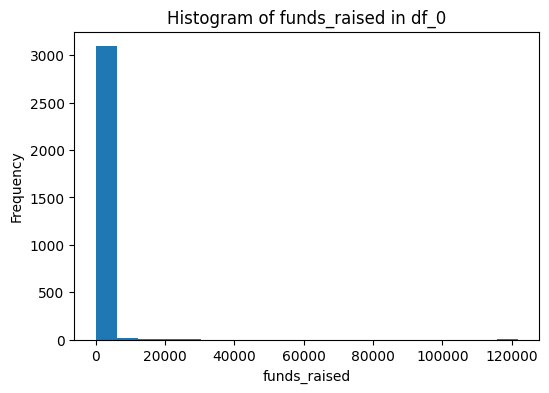

In [18]:
missing_values_0 = df_0.isnull().sum()
print("Missing Values in df_0:")
print(missing_values_0)

print("\nData Summary for df_0:")
print(df_0.info())
print(df_0.describe(include='all'))

duplicate_rows_0 = df_0[df_0.duplicated()]
print(f"\nDuplicate Rows in df_0: {len(duplicate_rows_0)}")

categorical_columns = ['company', 'location', 'industry', 'date']
for col in categorical_columns:
    print(f"\n{col} value counts in df_0:")
    print(df_0[col].value_counts())

numerical_columns = df_0.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_0[col])
    plt.title(f'Boxplot of {col} in df_0')
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.hist(df_0[col], bins=20)
    plt.title(f'Histogram of {col} in df_0')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## removing outliers

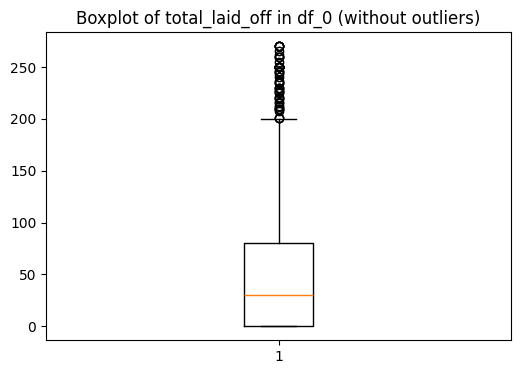

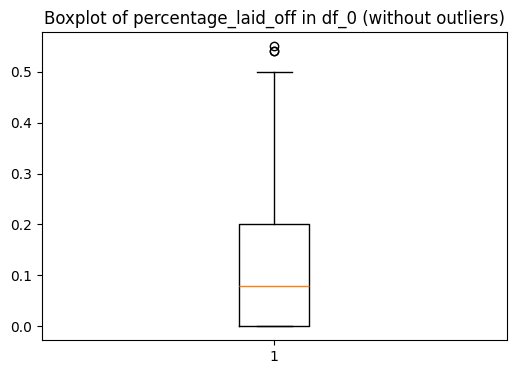

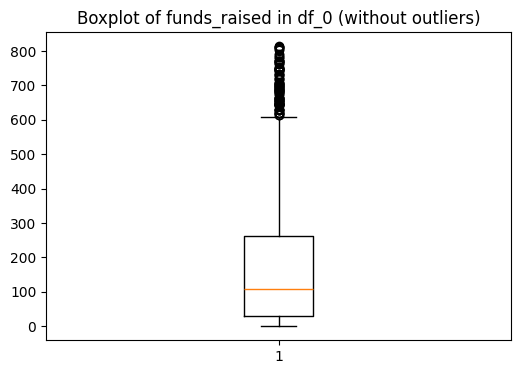

In [19]:
numerical_columns = df_0.select_dtypes(include=['float64', 'int64']).columns

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_0_no_outliers = df_0.copy()
for col in numerical_columns:
    df_0_no_outliers = remove_outliers(df_0_no_outliers, col)

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_0_no_outliers[col])
    plt.title(f'Boxplot of {col} in df_0 (without outliers)')
    plt.show()

### comparison with & without outlier 

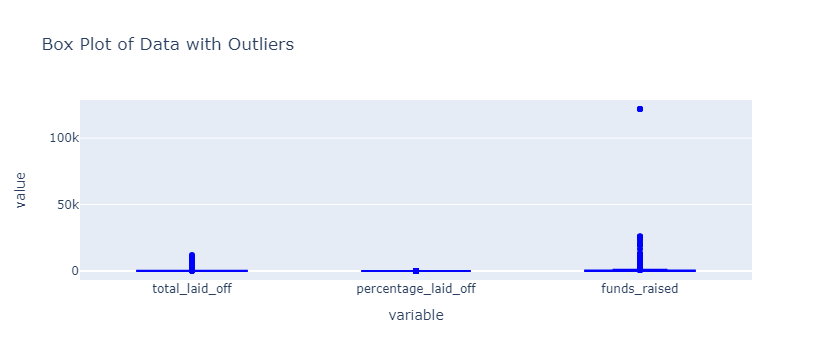

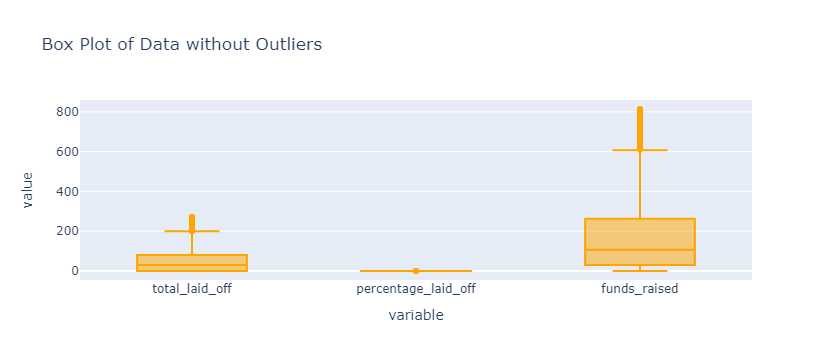

In [20]:
numerical_columns = ['total_laid_off', 'percentage_laid_off', 'funds_raised']

fig1 = px.box(df_0[numerical_columns], title='Box Plot of Data with Outliers')
fig1.update_traces(marker=dict(color='blue'))  

fig2 = px.box(df_0_no_outliers[numerical_columns], title='Box Plot of Data without Outliers')
fig2.update_traces(marker=dict(color='orange'))  

fig1.show()
fig2.show()

In [43]:
df_0['date'] = pd.to_datetime(df_0['date'])

In [44]:
df_1['date'] = pd.to_datetime(df_1['date'])

# data visualization 

### Top 10 Companies with Maximum Laid Off

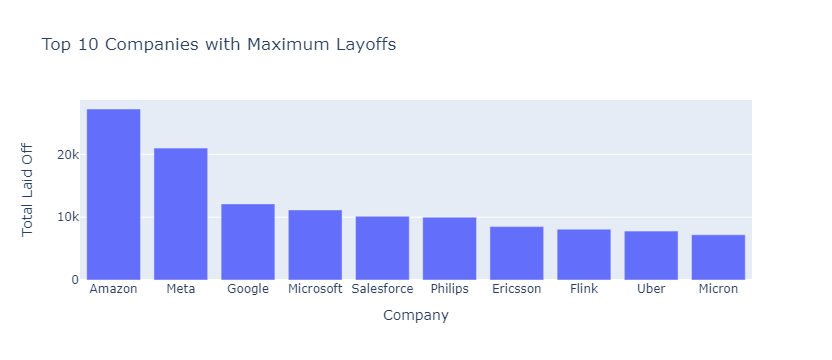

In [23]:
top_10_companies = df_0.groupby('company')['total_laid_off'].sum().nlargest(10).reset_index()
fig_top_10_companies = px.bar(top_10_companies, x='company', y='total_laid_off', 
                               title='Top 10 Companies with Maximum Layoffs')
fig_top_10_companies.update_layout(xaxis_title='Company', yaxis_title='Total Laid Off')
fig_top_10_companies.show()

### Top 3 Companies that laid off year-wise

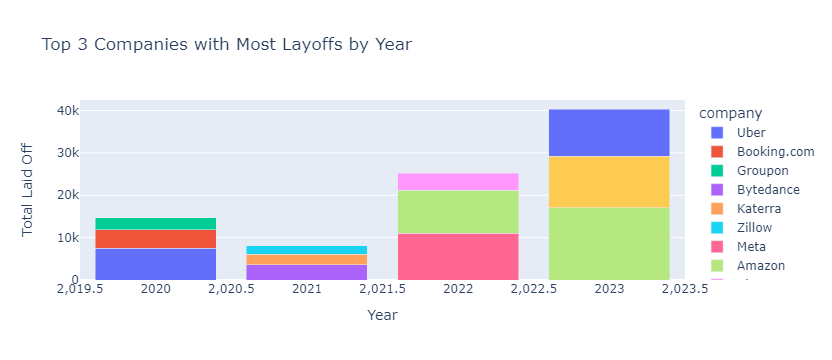

In [24]:
df_0['year'] = df_0['date'].dt.year

grouped = df_0.groupby(['year', 'company'])['total_laid_off'].sum().reset_index()

top_3_companies = (
    grouped.sort_values(['year', 'total_laid_off'], ascending=[True, False])
    .groupby('year').head(3)
)

fig = px.bar(top_3_companies, x='year', y='total_laid_off', color='company',
             title='Top 3 Companies with Most Layoffs by Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Laid Off', barmode='stack')
fig.show()

### Top 3 Locations where most layoffs happened year-wise

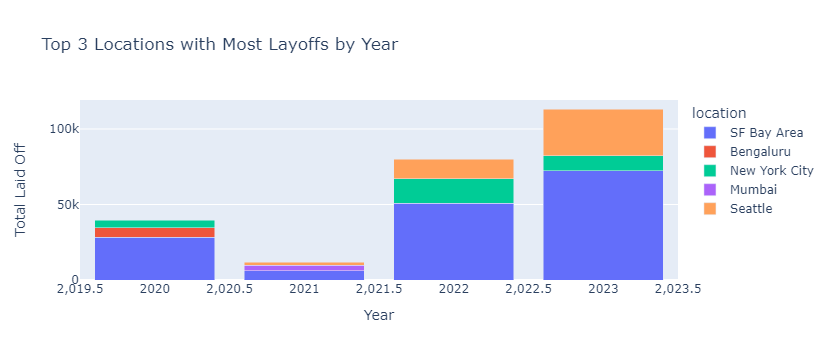

In [25]:
df_0['year'] = df_0['date'].dt.year

grouped = df_0.groupby(['year', 'location'])['total_laid_off'].sum().reset_index()

top_3_locations = (
    grouped.sort_values(['year', 'total_laid_off'], ascending=[True, False])
    .groupby('year').head(3)
)

fig = px.bar(top_3_locations, x='year', y='total_laid_off', color='location',
             title='Top 3 Locations with Most Layoffs by Year')

fig.update_layout(xaxis_title='Year', yaxis_title='Total Laid Off', barmode='stack')
fig.show()

### Top 20 Companies that laid off x% of employees

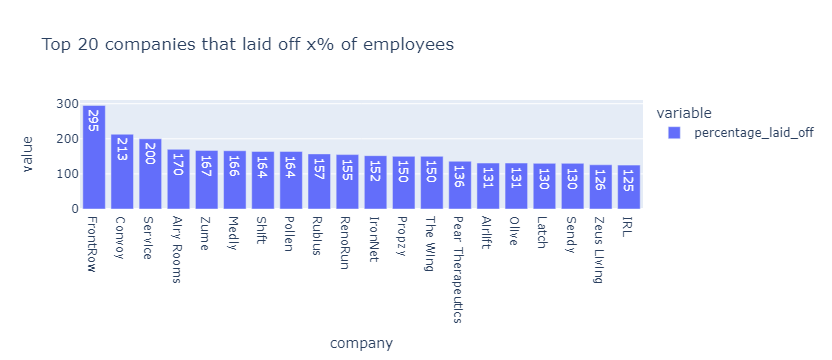

In [26]:
top_20 = df.groupby('company').sum().sort_values(by='percentage_laid_off',ascending=False).head(20)['percentage_laid_off'] * 100.0

px.bar(top_20,text_auto=True,title='Top 20 companies that laid off x% of employees')

### Top 10 Countries where most layoffs happened

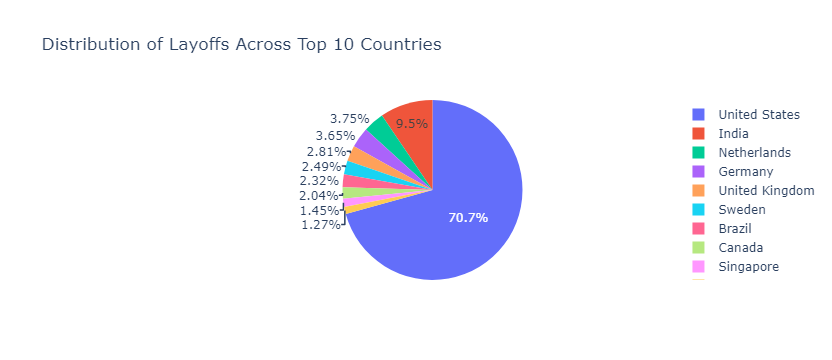

In [27]:
top_countries = df_0.groupby('country')['total_laid_off'].sum().nlargest(10).reset_index()

fig = px.pie(top_countries, values='total_laid_off', names='country', 
             title='Distribution of Layoffs Across Top 10 Countries')

fig.show()

### Top 10 Locations where most layoffs happened in USA.

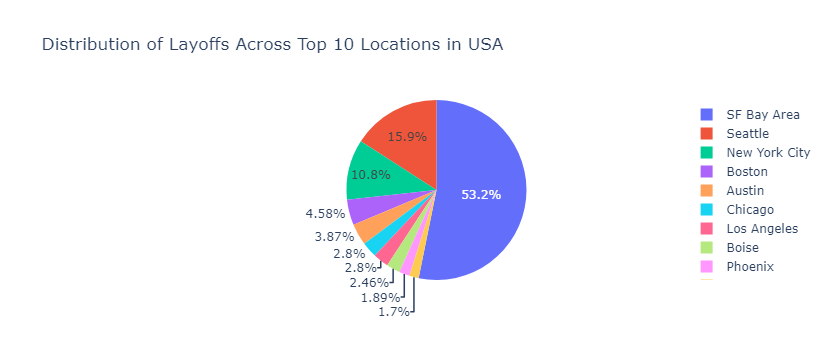

In [28]:
usa_locations = df_0[df_0['country'] == 'United States']

top_usa_locations = usa_locations.groupby('location')['total_laid_off'].sum().nlargest(10).reset_index()

fig = px.pie(top_usa_locations, values='total_laid_off', names='location', 
             title='Distribution of Layoffs Across Top 10 Locations in USA')

fig.show()

# visualizations for my country❤️-INDIA

### Top Locations where most layoffs happened in India

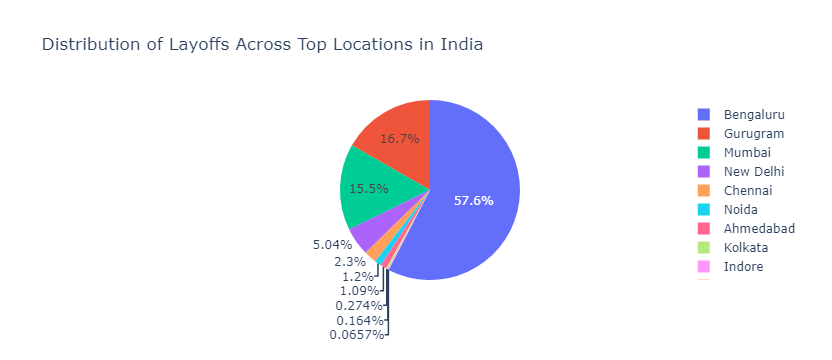

In [29]:
india_locations = df_0[df_0['country'] == 'India']

top_india_locations = india_locations.groupby('location')['total_laid_off'].sum().nlargest(10).reset_index()

fig = px.pie(top_india_locations, values='total_laid_off', names='location', 
             title='Distribution of Layoffs Across Top Locations in India',
             hover_data=['total_laid_off'], labels={'location': 'Location', 'total_laid_off': 'Total Layoffs'})

fig.show()

### relationship between funds and layoffs -INIDA

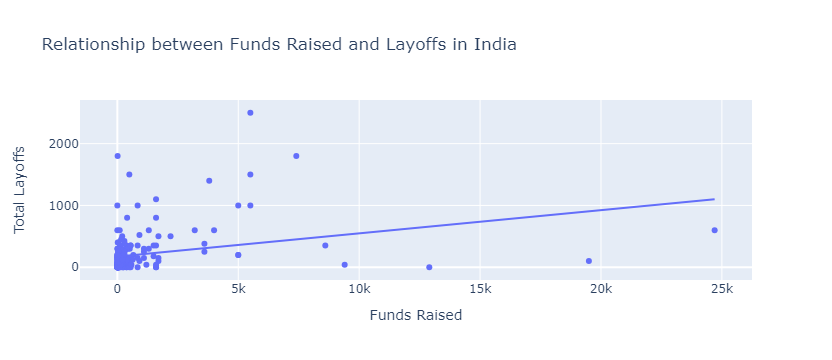

In [30]:
india_data = df_0[df_0['country'] == 'India']

fig = px.scatter(india_data, x='funds_raised', y='total_laid_off',
                 title='Relationship between Funds Raised and Layoffs in India',
                 labels={'funds_raised': 'Funds Raised', 'total_laid_off': 'Total Layoffs'},
                 hover_data=['company', 'location', 'industry','date'],
                 trendline='ols')  

fig.show()

### layoffs by company stage -INDIA

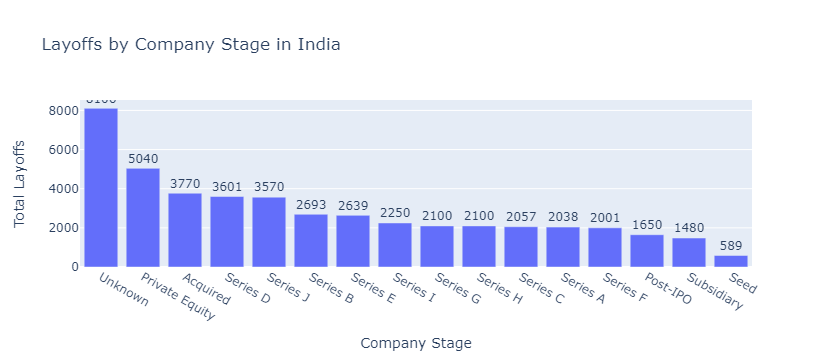

In [31]:
india_data = df_0[df_0['country'] == 'India']

stage_layoffs = india_data.groupby('stage')['total_laid_off'].sum().reset_index()

stage_layoffs_sorted = stage_layoffs.sort_values('total_laid_off', ascending=False)

fig = px.bar(stage_layoffs_sorted, x='stage', y='total_laid_off',
             title='Layoffs by Company Stage in India',
             labels={'total_laid_off': 'Total Layoffs', 'stage': 'Company Stage'},
             hover_data={'stage': False, 'total_laid_off': True},
             text='total_laid_off', 
             )

fig.update_traces(texttemplate='%{text}', textposition='outside')  

fig.update_layout(xaxis={'categoryorder': 'total descending'})  

fig.show()

### company with most layoffs INDIA

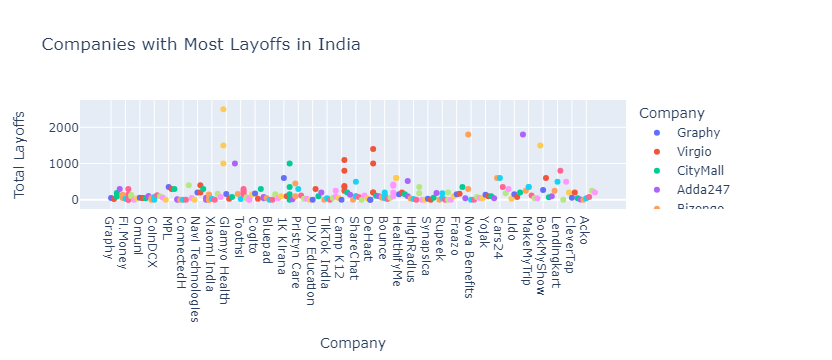

The company with the most layoffs in India is 'Byju's' with 5000.0 layoffs.


In [32]:
india_data = df_0[df_0['country'] == 'India']

company_layoffs = india_data.groupby('company')['total_laid_off'].sum().reset_index()

company_most_layoffs = company_layoffs.loc[company_layoffs['total_laid_off'].idxmax()]

fig = px.scatter(india_data, x='company', y='total_laid_off', color='company',
                 title='Companies with Most Layoffs in India',
                 labels={'company': 'Company', 'total_laid_off': 'Total Layoffs'},
                 hover_data={'year', 'total_laid_off'})

fig.show()

print(f"The company with the most layoffs in India is '{company_most_layoffs['company']}' "
      f"with {company_most_layoffs['total_laid_off']} layoffs.")

### Industry with most layoffs -INDIA 

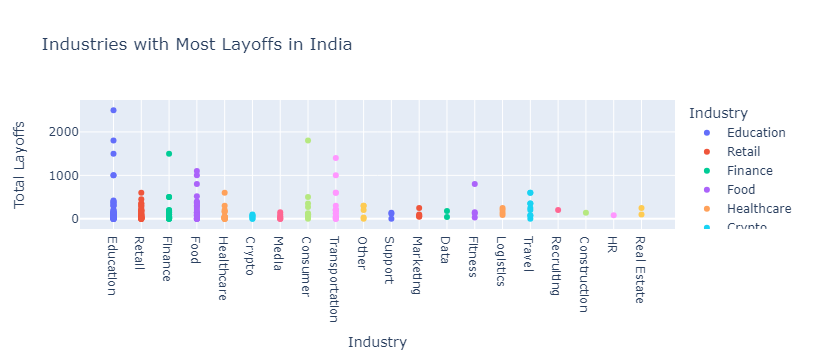

The industry with the most layoffs in India is 'Education' with 12829.0 layoffs.


In [33]:
india_data = df_0[df_0['country'] == 'India']

industry_layoffs = india_data.groupby('industry')['total_laid_off'].sum().reset_index()

industry_most_layoffs = industry_layoffs.loc[industry_layoffs['total_laid_off'].idxmax()]

fig = px.scatter(india_data, x='industry', y='total_laid_off', color='industry',
                 title='Industries with Most Layoffs in India',
                 labels={'industry': 'Industry', 'total_laid_off': 'Total Layoffs'},
                 hover_data={'year', 'total_laid_off', 'company', 'location', 'stage'})

fig.show()

print(f"The industry with the most layoffs in India is '{industry_most_layoffs['industry']}' "
      f"with {industry_most_layoffs['total_laid_off']} layoffs.")

### layoffs by year-wise -INDIA

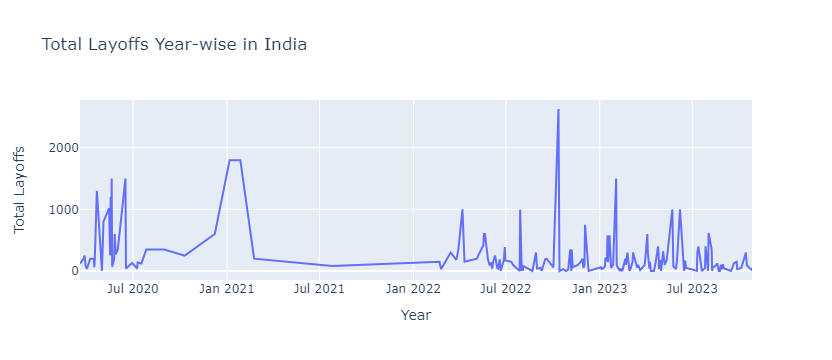

In [34]:
india_data = df_0[df_0['country'] == 'India']

yearly_layoffs = india_data.groupby('date')['total_laid_off'].sum().reset_index()

fig = px.line(yearly_layoffs, x='date', y='total_laid_off',
              title='Total Layoffs Year-wise in India',
              labels={'date': 'Year', 'total_laid_off': 'Total Layoffs'},
              hover_data={'date': True, 'total_laid_off': True})

fig.show()

### year wise layoff by industry - INDIA

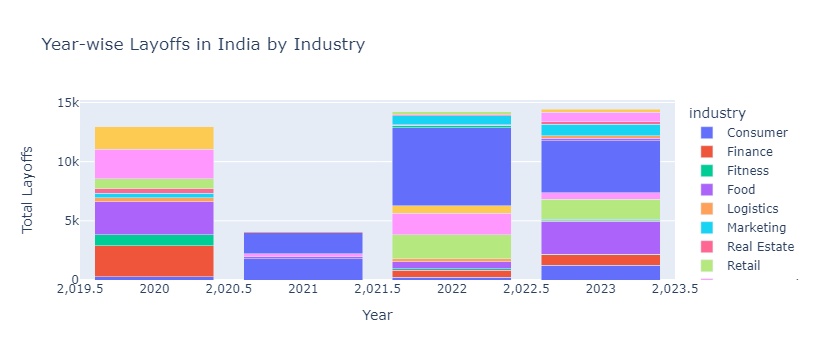

In [35]:
import plotly.express as px

df_0['year'] = df_0['date'].dt.year

india_data = df_0[df_0['country'] == 'India']

yearly_layoffs_by_industry = india_data.groupby(['year', 'industry'])['total_laid_off'].sum().reset_index()

fig = px.bar(yearly_layoffs_by_industry, x='year', y='total_laid_off', color='industry',
             title='Year-wise Layoffs in India by Industry',
             labels={'year': 'Year', 'total_laid_off': 'Total Layoffs'},
             hover_data={'year': True, 'industry': True, 'total_laid_off': True},
             barmode='stack')
fig.show()

### Relationship between funds received and layoffs.

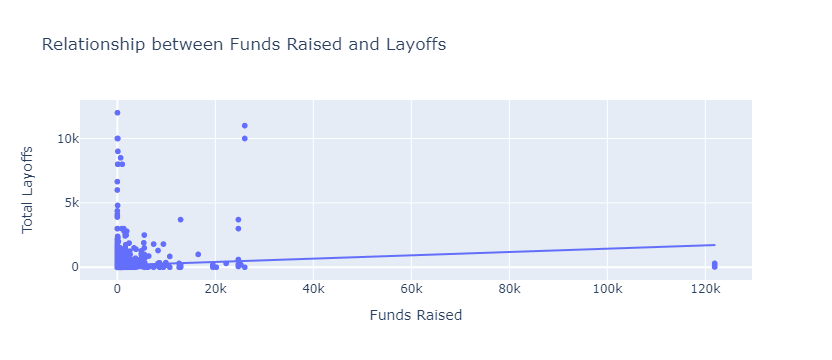

In [36]:
fig = px.scatter(df_0, x='funds_raised', y='total_laid_off',
                 title='Relationship between Funds Raised and Layoffs',
                 labels={'funds_raised': 'Funds Raised', 'total_laid_off': 'Total Layoffs'},
                 hover_data=['company', 'location', 'industry','date','country'],
                 trendline='ols')  

fig.show()

### In which stage of the company had the most lay-offs?

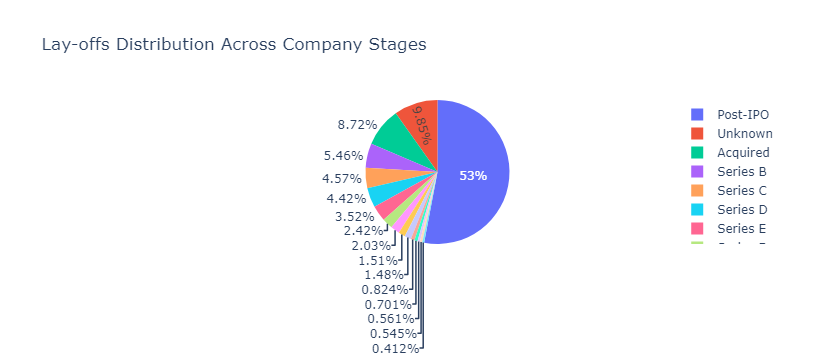

In [37]:
stage_layoffs = df_0.groupby('stage')['total_laid_off'].sum().reset_index()

fig = px.pie(stage_layoffs, values='total_laid_off', names='stage', 
             title='Lay-offs Distribution Across Company Stages')
fig.show()

### Which industry had the most layoffs?

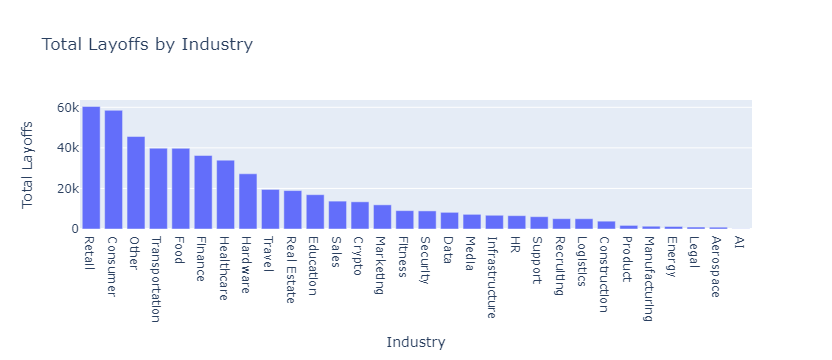

In [38]:
industry_layoffs = df_0.groupby('industry')['total_laid_off'].sum().reset_index()

industry_layoffs = industry_layoffs.sort_values(by='total_laid_off', ascending=False)

fig = px.bar(industry_layoffs, x='industry', y='total_laid_off',
             title='Total Layoffs by Industry', labels={'industry': 'Industry', 'total_laid_off': 'Total Layoffs'})
fig.update_xaxes(categoryorder='total descending')  
fig.show()

### Total layoffs year-wise?

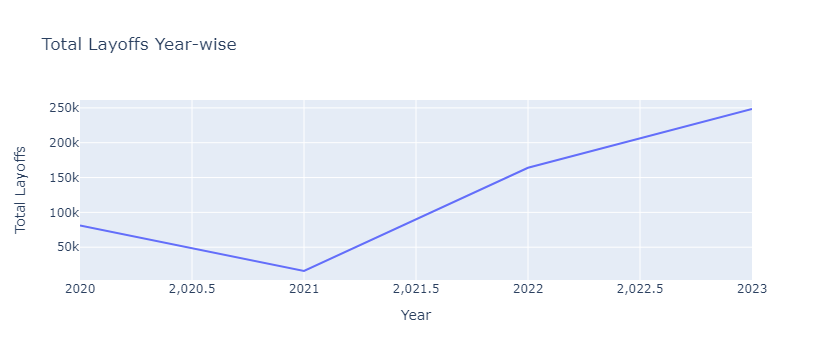

In [39]:
df_0['year'] = df_0['date'].dt.year

yearly_layoffs = df_0.groupby('year')['total_laid_off'].sum().reset_index()

fig = px.line(yearly_layoffs, x='year', y='total_laid_off',
              title='Total Layoffs Year-wise',
              labels={'year': 'Year', 'total_laid_off': 'Total Layoffs'})
fig.show()

### Year wise layoffs according to country?

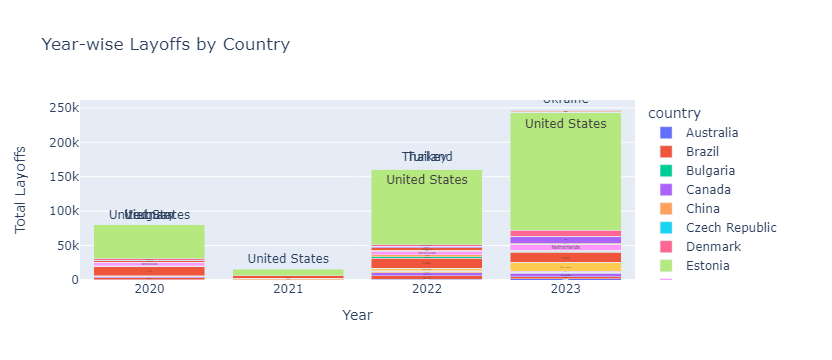

In [40]:
df_0['year'] = df_0['date'].dt.year

yearly_layoffs_by_country = df_0.groupby(['year', 'country'])['total_laid_off'].sum().reset_index()

fig = px.bar(yearly_layoffs_by_country, x='year', y='total_laid_off', color='country',
             title='Year-wise Layoffs by Country',
             labels={'year': 'Year', 'total_laid_off': 'Total Layoffs'},
             hover_data={'year': True, 'country': True, 'total_laid_off': True},
             text='country',  
             barmode='stack')

fig.update_traces(textposition='outside')  
fig.show()

# dash web app to select individual country to analyse layoffs by year

In [41]:
df_0['year'] = df_0['date'].dt.year

yearly_layoffs_by_country = df_0.groupby(['year', 'country'])['total_laid_off'].sum().reset_index()

app = JupyterDash(__name__)

country_options = [{'label': country, 'value': country} for country in yearly_layoffs_by_country['country'].unique()]

app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=country_options,
        value=yearly_layoffs_by_country['country'].unique()[0]  
    ),
    dcc.Graph(id='yearly-layoffs-graph')
])

@app.callback(
    Output('yearly-layoffs-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered_data = yearly_layoffs_by_country[yearly_layoffs_by_country['country'] == selected_country]
    
    fig = px.bar(filtered_data, x='year', y='total_laid_off',
                 title=f'Layoffs Over Years in {selected_country}',
                 labels={'year': 'Year', 'total_laid_off': 'Total Layoffs'},
                 hover_data={'year': True, 'total_laid_off': True},
                 barmode='stack')
    
    fig.update_traces(textposition='outside')
    return fig

app.run_server(mode='external')  

Dash app running on http://127.0.0.1:8050/
